In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['BlackFriday.csv']


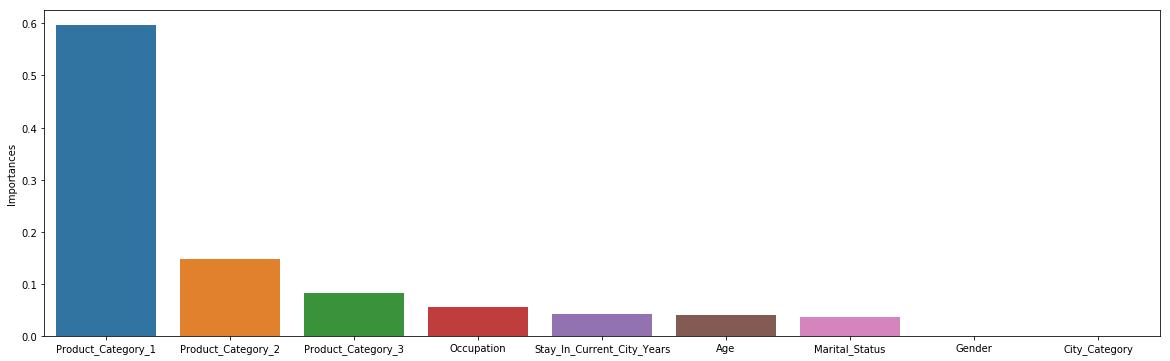

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


0.00035
0.001


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
lbl= LabelEncoder()
sc=StandardScaler()
rc= RandomForestClassifier(criterion= 'entropy',n_estimators=10,random_state=0,max_leaf_nodes=10)
rcFeature= RandomForestClassifier(criterion= 'entropy',n_estimators=10,random_state=0,max_leaf_nodes=10)
rcNew= RandomForestClassifier(criterion= 'entropy',n_estimators=10,random_state=0,max_leaf_nodes=100)
df= pd.read_csv('../input/BlackFriday.csv')[0:100000]
#display(df)
#print(df.shape)
X= df.fillna(0).iloc[:,2:11].values
Xpurchased = df.fillna(0).iloc[:,8:9].values
Xpd= df.fillna(0).iloc[:,2:11]
Ypd = df.iloc[:,11]
#display(Xpd)
for i in range(0,5):
    if i !=2:
        X[:,i]=lbl.fit_transform(X[:,i])
#print(X)
rcFeature.fit(X,Ypd)
#This is percentage the feature Importance of each X_features for predicting the amount of purchase
rc_Feature_Imprtnc = pd.DataFrame(rcFeature.feature_importances_,index= Xpd.columns,columns=['Importances']).sort_values('Importances',ascending=False)
#print(rc_Feature_Imprtnc.shape)
plt.figure(figsize=(20,6))
sns.barplot(x=rc_Feature_Imprtnc.index,y=rc_Feature_Imprtnc['Importances'])
plt.show()
ohe= OneHotEncoder(categorical_features=[0,1,3,4])
X= ohe.fit_transform(X).toarray()
Y = df.iloc[:,11].values

#print(Y.columns[11])
#print(X)


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as ac
X_train,X_test,y_train,y_test = train_test_split(X,Y ,test_size=0.2,random_state=0)
rc.fit(X_train,y_train)
y_Pred = rc.predict(X_test)
print(ac(y_test,y_Pred))
X_train,X_test,y_train,y_test = train_test_split(Xpurchased,Y ,test_size=0.2,random_state=0)
rcNew.fit(X_train,y_train)
y_Pred = rcNew.predict(X_test)
print(ac(y_test,y_Pred))

,Total
Female,132197
Male,405380


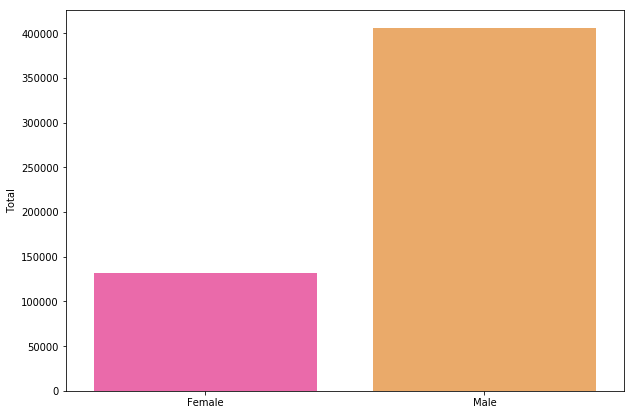

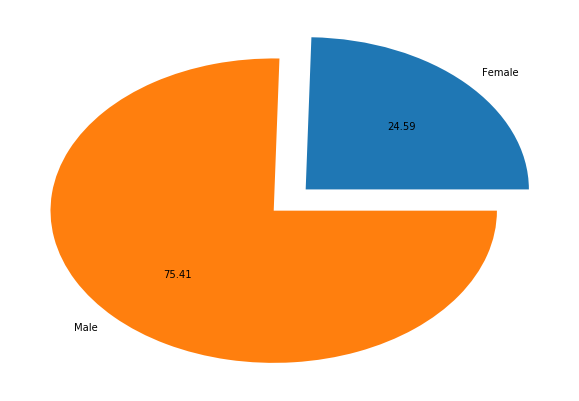

In [3]:
 # Total Purchases By gender
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
lbl= LabelEncoder()
sc=StandardScaler()
df= pd.read_csv('../input/BlackFriday.csv')
#display(df)
tempListF=[]
tempListM=[]
Gender= df.iloc[:,2]
countF=[each for each in Gender if each =='F']
countM=[each for each in Gender if each =='M']
tempListF.append(countF.count('F'))
tempListM.append(countM.count('M'))
FDataFrame= pd.DataFrame(tempListF,index=['Female'],columns=['Total'])
MDataFrame= pd.DataFrame(tempListM,index=['Male'],columns=['Total'])
FMDataFrame= pd.concat([FDataFrame,MDataFrame],axis=0)
display(FMDataFrame)
plt.figure(figsize=(10,7))
sns.barplot(x=FMDataFrame.index,y=FMDataFrame['Total'],palette='spring')
plt.show()
plt.figure(figsize=(10,7))
plt.pie([countF.count('F'),countM.count('M')],labels=['Female','Male'],autopct='%.2f',explode=(0.1,0.1))
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
lbl= LabelEncoder()
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('../input/BlackFriday.csv')
Age=df.iloc[:,3:4].values
AgeValues=[]
for j in Age:
    #print(type(str(each)),str(each))
    k1=str(j).replace('[','').replace(']','')
    if k1 not in list(AgeValues):
        AgeValues.append(k1)
        #print(type(str(each)),str(each),type(list(ListN)),list(ListN))
print(AgeValues)
#print(Age.shape)
Age[:,0]= lbl.fit_transform(Age[:,0])
ListN=[]
AgeCount=[]
for each in Age:
    #print(type(str(each)),str(each))
    k=str(each).replace('[','').replace(']','')
    if k not in list(ListN):
        ListN.append(k)
        #print(type(str(each)),str(each),type(list(ListN)),list(ListN))
#print(ListN)     
for elem in ListN:
    count=0
    for each in Age:
        #print(elem,each)
        if elem == str(each).replace('[','').replace(']',''):
            count+=1
    AgeCount.append(count)
print(AgeCount)
plt.figure(figsize=(16,10))
plt.pie([AgeCount[0],AgeCount[1],AgeCount[2],AgeCount[3],AgeCount[4],AgeCount[5],AgeCount[6]],labels=[AgeValues[0],AgeValues[1],AgeValues[2],AgeValues[3],AgeValues[4],AgeValues[5],AgeValues[6]],autopct='%.2f',explode=(0.08,0.05,0.05,0.05,0.05,0.05,0.05))
plt.xlabel('Percentage of Different Age Groups Purchasing Products')
plt.show()



